## The Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from turtle import color

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.feature_selection import RFE
from sklearn.impute import KNNImputer

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.combine import SMOTETomek

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix,mean_squared_error)

sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning:

urllib3 (1.26.15) or chardet (3.0.4) doesn't match a supported version!



## The Data

In [2]:
df=pd.read_csv('food_final.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)

In [3]:
df.head()

,Fast_food_consumption,Hostel_or_restaurant_meals,Snacking_frequency,Source_of_protein,Daily_water_drinking,Taking_dietary_supplements,Alcohol_consumption,Any_food_allergies,Consumption_of_high_fat_items,Physical_and_mental_illness,Indigestion_and_bloating,Dehydration,Overall_effect
0,NaN,Hostel meals,2-3 times a day,Fish,1.5 - 2 litres a day,No,Occasionally,No,Sometimes in a week,No,No,No,Good 😀
1,More than 4 times a week,Restaurant meals,Less than once a day,Dairy,1.5 - 2 litres a day,No,Regularly,No,Sometimes in a week,Yes,Yes,No,Bad 😔
2,More than 4 times a week,Restaurant meals,More than 3 times a day,"Plant-based sources (e.g., beans, lentils, tofu)",1.5 - 2 litres a day,No,Never,No,NaN,Yes,No,No,Bad 😔
3,NaN,Restaurant meals,Once a day,"Plant-based sources (e.g., beans, lentils, tofu)",1.5 - 2 litres a day,No,Occasionally,No,Sometimes in a week,Yes,No,Yes,Bad 😔
4,1-2 times a week,Hostel meals,Once a day,Meat,1 - 1.5 litres a day,Yes,Occasionally,No,Daily,No,Yes,Yes,Good 😀


## Exploratory Data Analysis

In [106]:
df.shape

(120, 13)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Fast_food_consumption          101 non-null    object
 1   Hostel_or_restaurant_meals     93 non-null     object
 2   Snacking_frequency             120 non-null    object
 3   Source_of_protein              120 non-null    object
 4   Daily_water_drinking           120 non-null    object
 5   Taking_dietary_supplements     120 non-null    object
 6   Alcohol_consumption            120 non-null    object
 7   Any_food_allergies             96 non-null     object
 8   Consumption_of_high_fat_items  108 non-null    object
 9   Physical_and_mental_illness    120 non-null    object
 10  Indigestion_and_bloating       120 non-null    object
 11  Dehydration                    120 non-null    object
 12  Overall_effect                 120 non-null    object
dtypes: ob

In [113]:
df.describe()

,Fast_food_consumption,Hostel_or_restaurant_meals,Snacking_frequency,Source_of_protein,Daily_water_drinking,Taking_dietary_supplements,Alcohol_consumption,Any_food_allergies,Consumption_of_high_fat_items,Physical_and_mental_illness,Indigestion_and_bloating,Dehydration,Overall_effect
count,101,93,120,120,120,120,120,96,108,120,120,120,120
unique,4,2,4,5,5,2,4,2,4,2,2,2,2
top,1-2 times a week,Restaurant meals,Once a day,Meat,1.5 - 2 litres a day,No,Never,No,Sometimes in a week,Yes,No,No,Good 😀
freq,29,50,35,28,39,82,38,66,41,62,71,66,65


Text(0.5, 0, ' ')

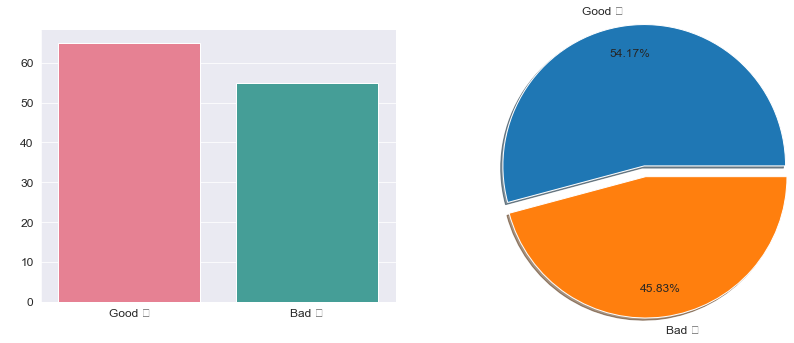

In [122]:
plt.figure(figsize=(14,5))

#barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df["Overall_effect"],palette='husl')
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True)

# pieplot
ax2 = plt.subplot(1,2,2)
explode=[0,0.1]
plt.pie(df["Overall_effect"].value_counts(),
        labels=list(df["Overall_effect"].unique()),
        explode=explode,
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':12},
   )
ax2.set_xlabel(" ")

### <u><b>Observations:-</b></u>

- Only 54.17% of the surveyed students are experiencing good health.
- An alarming 45.83% of the students surveyed are not in good health, which is a very bad sign.

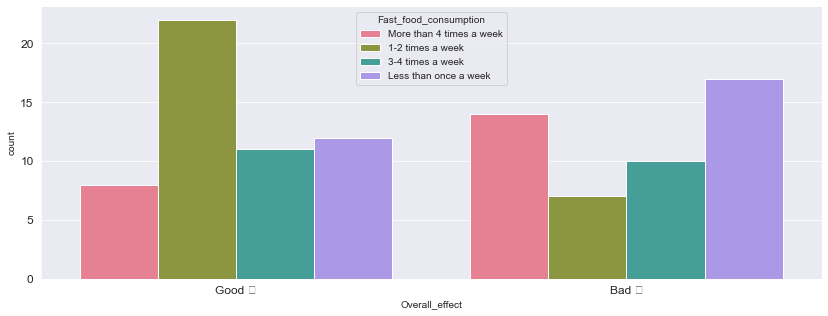

In [125]:
plt.figure(figsize=(14,5))

#barplot
cp = sns.countplot(x=df["Overall_effect"],hue=df['Fast_food_consumption'],palette='husl')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True)

### <u><b>Observations:-</b></u>

- Students who are eating fast food more than 4 times a week are mostly reporting poor health, indicating the negative effect of excessive fast food.
- Students who are eating fast food 1-2 times a week are mostly reporting good health, indicating that those students develop a good immunity.
- Students who are eating fast food less than once a week are often reporting poor health, indicating that those students do not develop a good immunity.

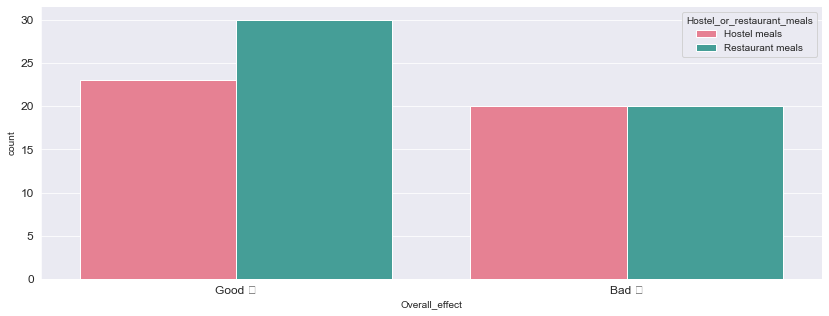

In [126]:
plt.figure(figsize=(14,5))

#barplot
cp = sns.countplot(x=df["Overall_effect"],hue=df['Hostel_or_restaurant_meals'],palette='husl')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True)

### <u><b>Observations:-</b></u>

- For students reporting poor health, preferring either of hostel or restaurant meals over the other does not affect their poor health condition.
- For the students reporting good health, it can be observed that the number of students preferring restaurant meals over hostel meals is more. This indicates students having slight issues with the hostel meals.

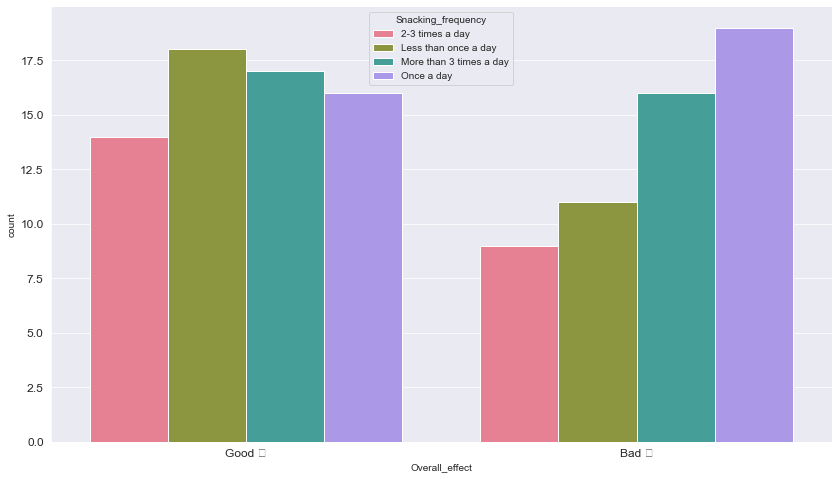

In [9]:
plt.figure(figsize=(14,8))

#barplot
cp = sns.countplot(x=df["Overall_effect"],hue=df['Snacking_frequency'],palette='husl')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True)

### <u><b>Observations:-</b></u>

- Students who snack 2-3 times a day mostly report good health.
- Students who snack once or less a day, report slightly poor health conditions.
- This indicates that snacking improves immunity of the body, that helps in the upkeep of the health of the students.

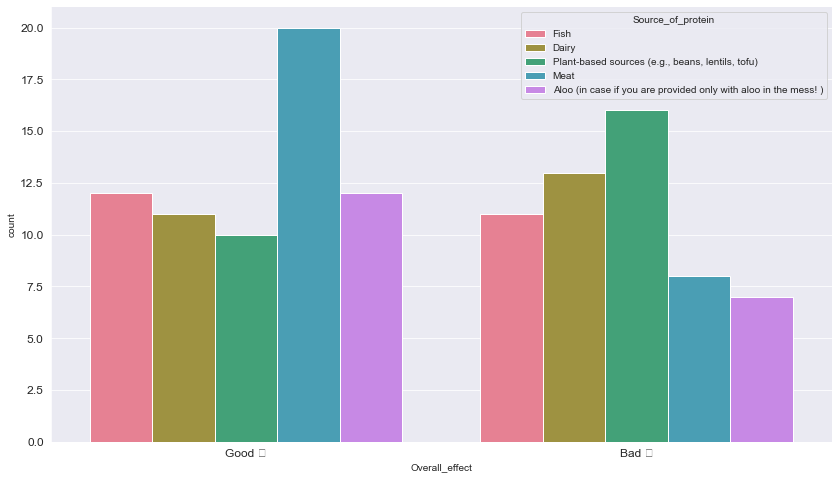

In [10]:
plt.figure(figsize=(14,8))

#barplot
cp = sns.countplot(x=df["Overall_effect"],hue=df['Source_of_protein'],palette='husl')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True)

### <u><b>Observations:-</b></u>

- Students having meat or fish as their source of protein, mostly report good health conditions.
- Students gaining protein from plant sources report mostly poor health conditions.
- Students acquiring heir protein requirements from dairy products, report slightly poor health conditions.
- Aloo(potato) option had been taken for the temporary period of bird-flu and some unavoidable circumstances due to which, dairy meat, and plant products were put on hold. As a result, potato was the sole source of carbohydrates and proteins.

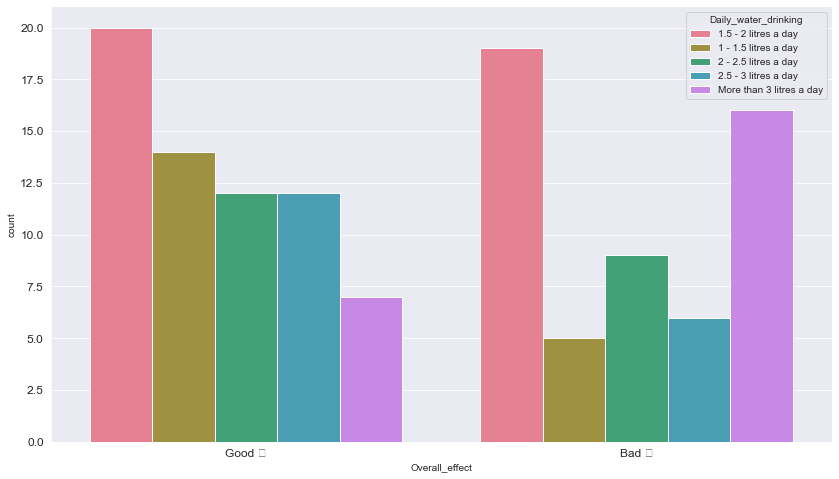

In [15]:
plt.figure(figsize=(14,8))

#barplot
cp = sns.countplot(x=df["Overall_effect"],hue=df['Daily_water_drinking'],palette='husl')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True)

### <u><b>Observations:-</b></u>

- Students drinking 1-3 litres of water a day mostly report good health conditions. This reflects the importance of water for digestion, osmoregulation and other such activities carried out by the body for its healthy upkeep.
- Students drinking excessive water, i.e., more than 3 litres of water a day, mostly report poor health conditions. Excessive water in the body reduces the concentration of essentials nutrients and ions in the bloodstream, and also puts excessive pressure on the kidneys.

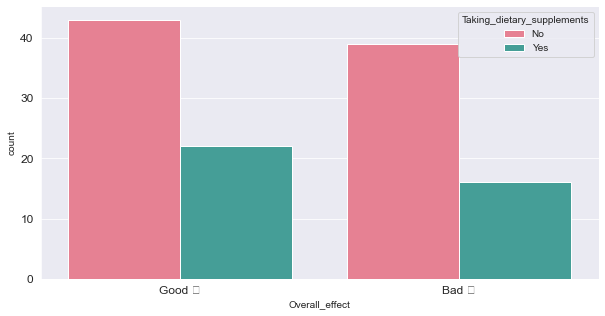

In [7]:
plt.figure(figsize=(10,5))

#barplot
cp = sns.countplot(x=df["Overall_effect"],hue=df['Taking_dietary_supplements'],palette='husl')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True)

### <u><b>Observations:-</b></u>

- Students taking dietary supplements mostly report good health conditions. It shows the deficiency of nutrients in the diets, causing them to take dietary supplements.

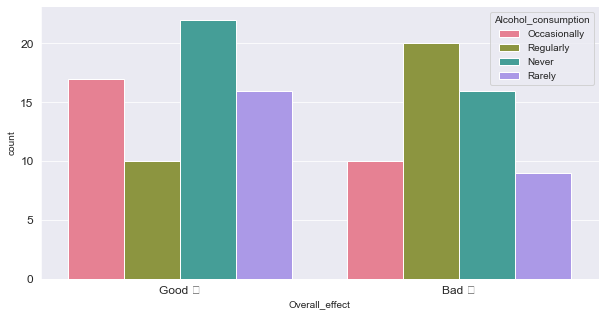

In [8]:
plt.figure(figsize=(10,5))

#barplot
cp = sns.countplot(x=df["Overall_effect"],hue=df['Alcohol_consumption'],palette='husl')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True)

### <u><b>Observations:-</b></u>

- Students consuming alcoholic beverages occassionally, rarely or never report good health conditions.
- Students taking alcoholic beverages regularly, mostly report poor health conditions, depicting the negative effect that alcohol has on our body.

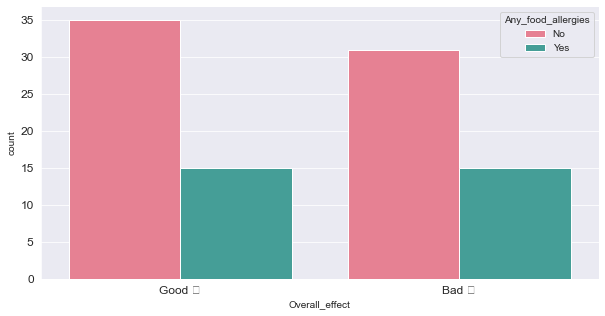

In [9]:
plt.figure(figsize=(10,5))

#barplot
cp = sns.countplot(x=df["Overall_effect"],hue=df['Any_food_allergies'],palette='husl')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True)

### <u><b>Observations:-</b></u>

- Students not having any food allergies, reporting slightly better health conditions.
- Students having food allergies report equally good and bad health conditions.

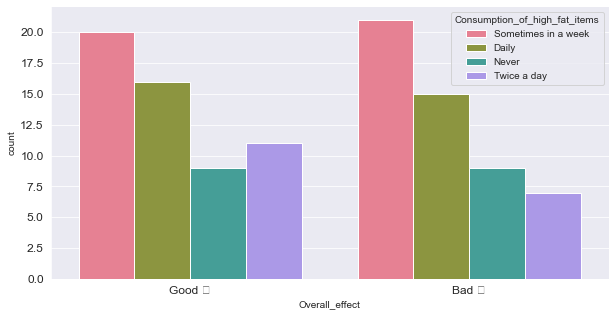

In [10]:
plt.figure(figsize=(10,5))

#barplot
cp = sns.countplot(x=df["Overall_effect"],hue=df['Consumption_of_high_fat_items'],palette='husl')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True)

### <u><b>Observations:-</b></u>

- Surprisingly, the students consuming fatty items more frequently, report better health conditions over those who consume lesser fatty items.
- The reason could be the students' higher requirements of vitamins A,D,E and K, which are fat soluble.

Text(0.5, 0, ' ')

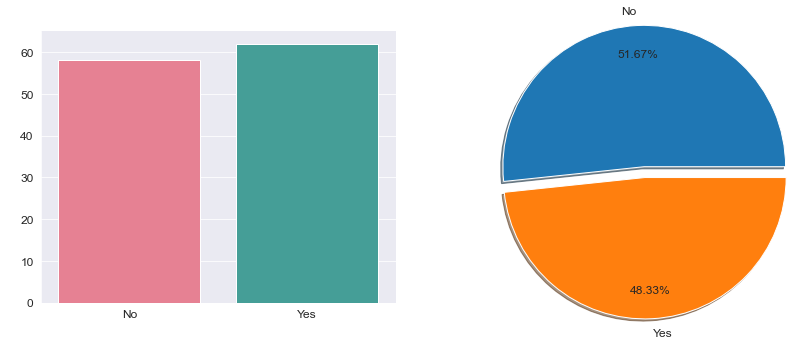

In [4]:
plt.figure(figsize=(14,5))

#barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df['Physical_and_mental_illness'],palette='husl')
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True)

# pieplot
ax2 = plt.subplot(1,2,2)
explode=[0,0.1]
plt.pie(df['Physical_and_mental_illness'].value_counts(),
        labels=list(df['Physical_and_mental_illness'].unique()),
        explode=explode,
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':12},
   )
ax2.set_xlabel(" ")

### <u><b>Observations:-</b></u>

- An unfortunate 48.33% of the students have reported suffering from physical and mental illness.
- 51.67% students are in good physical and mental health.

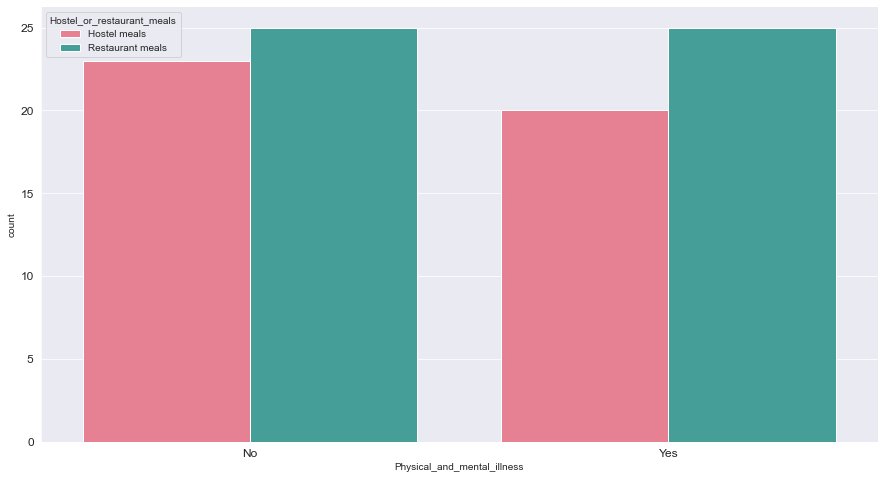

In [7]:
plt.figure(figsize=(15,8))

#barplot
cp = sns.countplot(x=df["Physical_and_mental_illness"],hue=df['Hostel_or_restaurant_meals'],palette='husl')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True)

### <u><b>Observations:-</b></u>

- Most of the students who prefer hostel meals over restaurant_meals are physically and mentally fit.

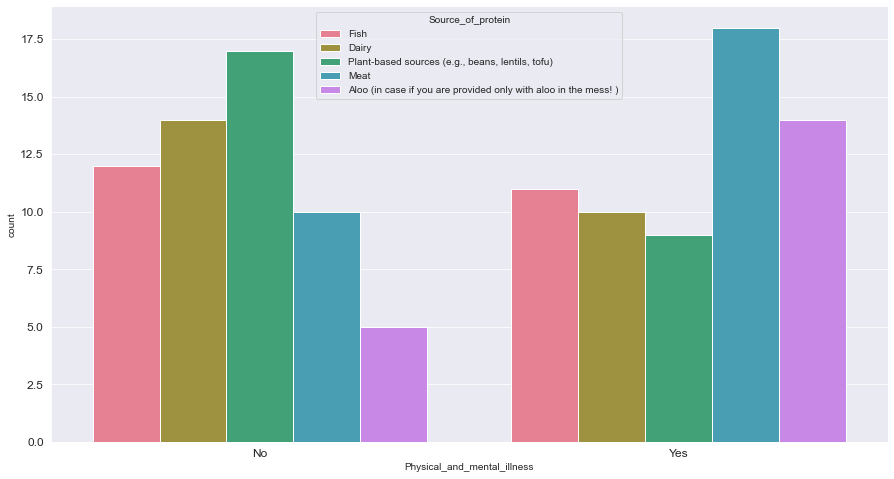

In [8]:
plt.figure(figsize=(15,8))

#barplot
cp = sns.countplot(x=df["Physical_and_mental_illness"],hue=df['Source_of_protein'],palette='husl')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True)

### <u><b>Observations:-</b></u>

- Students having fish,dairy and plant-based sources as their sources of protein are mostly physically and mentally fit.
- Students having meat and potatoes as their sources of protein are mostly unfit, both physically and mentally.

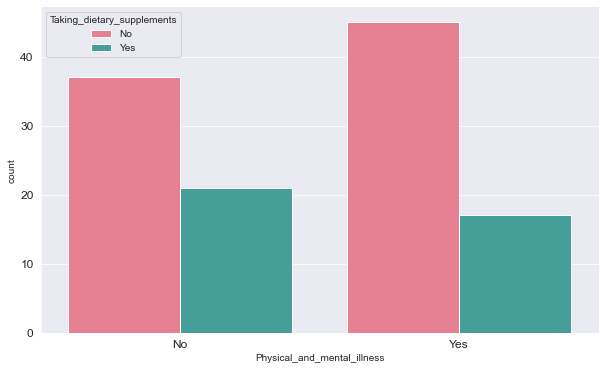

In [11]:
plt.figure(figsize=(10,6))

#barplot
cp = sns.countplot(x=df["Physical_and_mental_illness"],hue=df['Taking_dietary_supplements'],palette='husl')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True)

### <u><b>Observations:-</b></u>

- Students taking dietary supplements are mostly physically and mentally well.
- Students not taking external dietary supplements are mostly physically and mentally unwell.

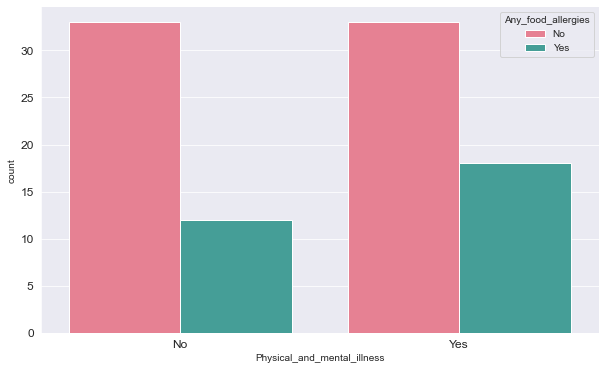

In [13]:
plt.figure(figsize=(10,6))

#barplot
cp = sns.countplot(x=df["Physical_and_mental_illness"],hue=df['Any_food_allergies'],palette='husl')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True)

### <u><b>Observations:-</b></u>

- Students having food allergies are more likely to be physically and mentally unfit.

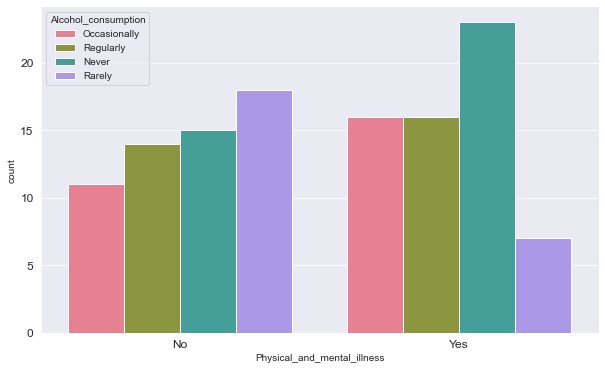

In [16]:
plt.figure(figsize=(10,6))

#barplot
cp = sns.countplot(x=df["Physical_and_mental_illness"],hue=df['Alcohol_consumption'],palette='husl')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True)

### <u><b>Observations:-</b></u>

- Students consuming alcoholic beverages never, occassionally or regularly are mostly physically and mentally unwell.
- Students taking alcoholic beverages rarely are both physically and mentally fit.

Text(0.5, 0, ' ')

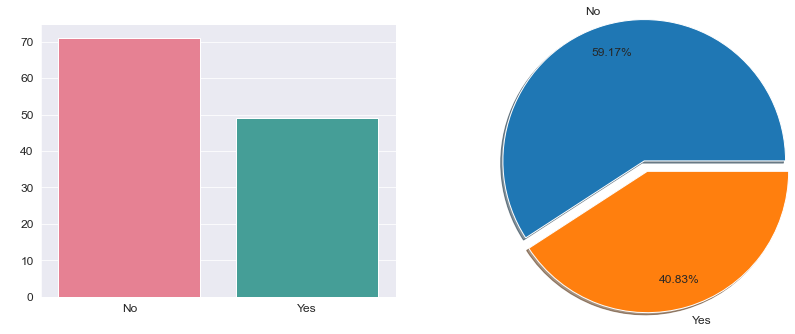

In [5]:
plt.figure(figsize=(14,5))

#barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df['Indigestion_and_bloating '],palette='husl')
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True)

# pieplot
ax2 = plt.subplot(1,2,2)
explode=[0,0.1]
plt.pie(df['Indigestion_and_bloating '].value_counts(),
        labels=list(df['Indigestion_and_bloating '].unique()),
        explode=explode,
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':12},
   )
ax2.set_xlabel(" ")

### <u><b>Observations:-</b></u>

- 40.83% of the students suffer from indigestion and bloating, while 59.17% do not.
- These figures suggest that the gastrointestinal well being of the students needs to be seriously addressed.

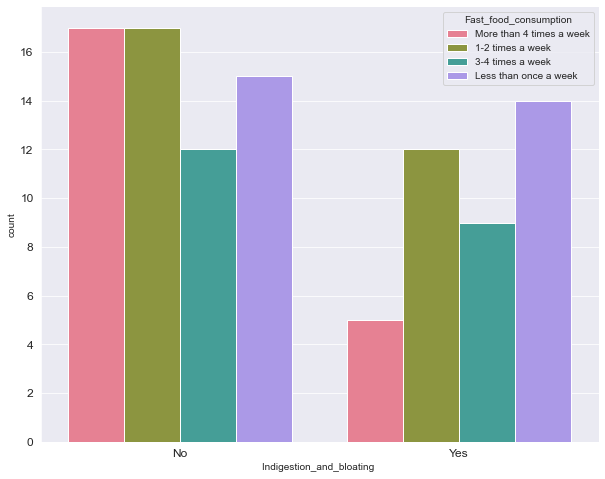

In [22]:
plt.figure(figsize=(10,8))

#barplot
cp = sns.countplot(x=df["Indigestion_and_bloating "],hue=df['Fast_food_consumption'],palette='husl')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True)

### <u><b>Observations:-</b></u>

- It can be clearly observed that students who regularly eat fast food develop a strong digestive system, as a result of which they don't face face problems of indigestion or bloating.

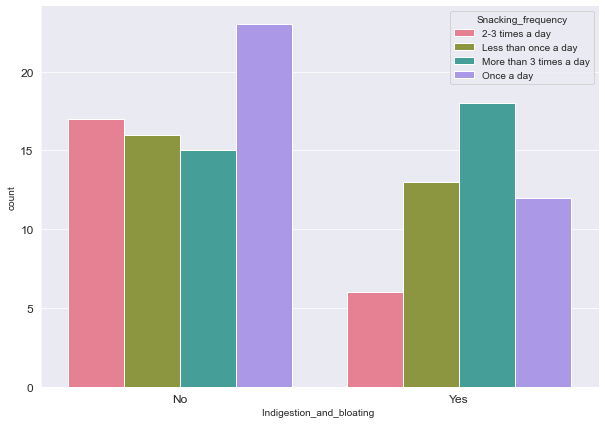

In [25]:
plt.figure(figsize=(10,7))

#barplot
cp = sns.countplot(x=df["Indigestion_and_bloating "],hue=df['Snacking_frequency'],palette='husl')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True)

### <u><b>Observations:-</b></u>

- Most of the students who snack once a day do not suffer from indigestion or bloating.
- As the daily snacking frequency decreases, the number of students suffering from indigestion or bloating also decreases.

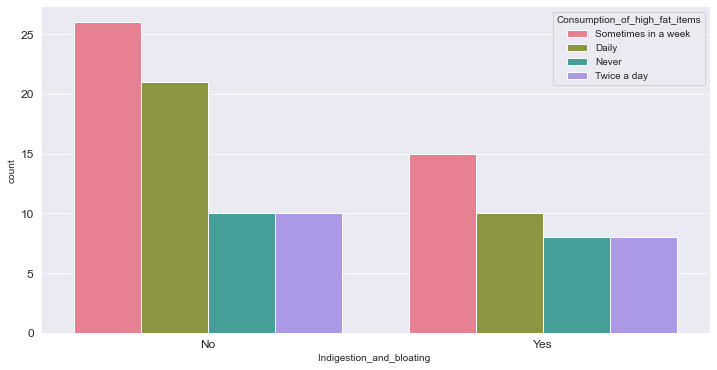

In [29]:
plt.figure(figsize=(12,6))

#barplot
cp = sns.countplot(x=df["Indigestion_and_bloating "],hue=df['Consumption_of_high_fat_items'],palette='husl')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True)

### <u><b>Observations:-</b></u>

- Students who snack once daily or sometimes a week, suffer less due to indigestion and bloating.

Text(0.5, 0, ' ')

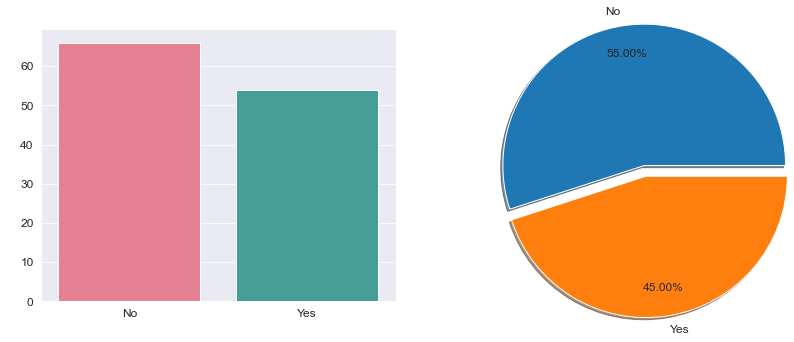

In [9]:
plt.figure(figsize=(14,5))

#barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df['Dehydration'],palette='husl')
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True)

# pieplot
ax2 = plt.subplot(1,2,2)
explode=[0,0.1]
plt.pie(df['Dehydration'].value_counts(),
        labels=list(df['Dehydration'].unique()),
        explode=explode,
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':12},
   )
ax2.set_xlabel(" ")

### <u><b>Observations:-</b></u>

- An alarming 45% of the students suffer from dehydration.
- The need for drinking adequate amounts of water should be strongly advocated among the students.

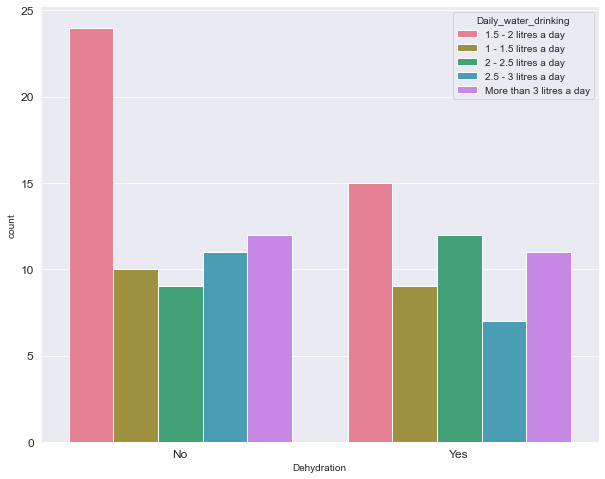

In [32]:
plt.figure(figsize=(10,8))

#barplot
cp = sns.countplot(x=df['Dehydration'],hue=df['Daily_water_drinking'],palette='husl')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(top=True, right=True)

### <u><b>Observations:-</b></u>

- Most of the students drinking 1.5-3 litres of water a day, do not suffer from dehydration.
- The students drinking less than what is required or in excess suffer from dehydration.

## Handling missing values

### Checking quantity of missing values

In [10]:
def missing_values_table(df):
        # Total missing values by column
        mis_val = df.isnull().sum()
        
        # Percentage of missing values by column
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # build a table with the the columns
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [11]:
missing_values_table(df)

Your selected dataframe has 13 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Hostel_or_restaurant_meals,27,22.5
Any_food_allergies,24,20.0
Fast_food_consumption,19,15.8
Consumption_of_high_fat_items,12,10.0


### Label Encoding

In [12]:
cat_cols=[i for i in df.columns if df[i].dtype=='object']
le=LabelEncoder()
for col in cat_cols:
    df[col]=le.fit_transform(df[col])

### Imputation using KNN Algorithm

In [13]:
imputer=KNNImputer(n_neighbors=5)
data=imputer.fit_transform(df)

In [14]:
cols=df.columns
df=pd.DataFrame(data,columns=cols)

In [15]:
df.head()

,Fast_food_consumption,Hostel_or_restaurant_meals,Snacking_frequency,Source_of_protein,Daily_water_drinking,Taking_dietary_supplements,Alcohol_consumption,Any_food_allergies,Consumption_of_high_fat_items,Physical_and_mental_illness,Indigestion_and_bloating,Dehydration,Overall_effect
0,4.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0
1,3.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,2.0,1.0,1.0,0.0,0.0
2,3.0,1.0,2.0,4.0,1.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0
3,4.0,1.0,3.0,4.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0
4,0.0,0.0,3.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


In [87]:
df=pd.read_csv('food_final_imputed.csv')
df.head()

,Fast_food_consumption,Hostel_or_restaurant_meals,Snacking_frequency,Source_of_protein,Daily_water_drinking,Taking_dietary_supplements,Alcohol_consumption,Any_food_allergies,Consumption_of_high_fat_items,Physical_and_mental_illness,Indigestion_and_bloating,Dehydration,Overall_effect
0,4.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0
1,3.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,2.0,1.0,1.0,0.0,0.0
2,3.0,1.0,2.0,4.0,1.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0
3,4.0,1.0,3.0,4.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0
4,0.0,0.0,3.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


### Feature Selection (Studying the Correlation Heat Map)

<Axes: >

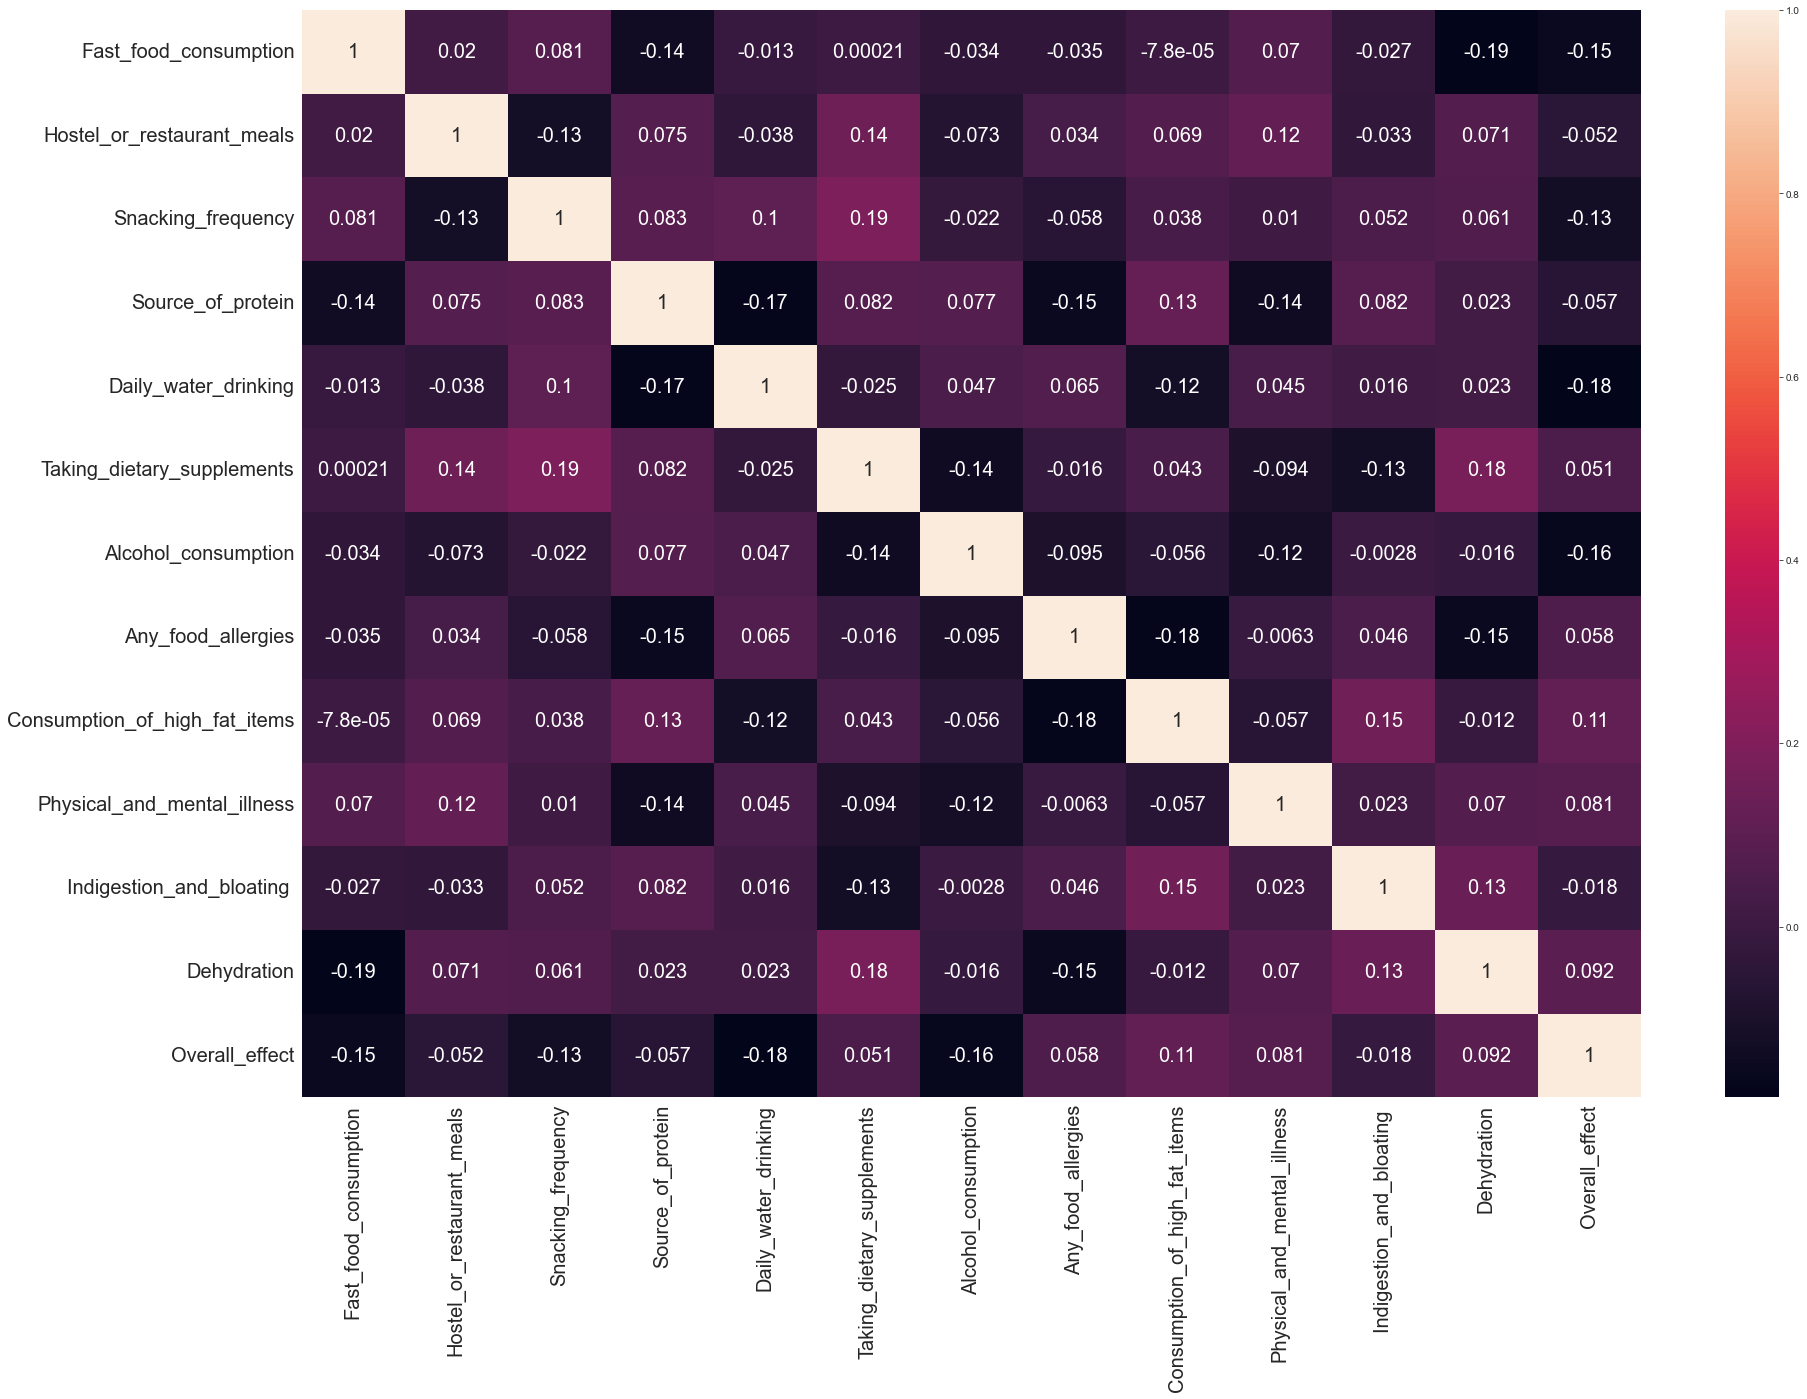

In [16]:
plt.figure(figsize=(30,20))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.heatmap(df.corr(),annot=True,annot_kws={'size':20})

### <u><b>Observations:-</b></u>

- All the features have correlation coefficients have magnitude less than 0.2
- Thus, all the features are independent, and can be taken for training the model.

## Separating the Target Variable and the other features

In [4]:
x=df.copy()
y=x.pop('Overall_effect')

## Train Test Split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,test_size=0.25,random_state=42)

## Resampling the Training Data

In [57]:
#Random minority oversampling followed by undersampling
smt = SMOTETomek(random_state=42)
x_train, y_train = smt.fit_resample(x_train, y_train)

## Building the Neural Network

In [65]:
model=Sequential()
model.add(Dropout(0.25))
model.add(Dense(1024,input_shape=(12,),activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [66]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:
history=model.fit(x_train, y_train,
          batch_size=4,
          epochs=100,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/100
20/20 [==============================] - 1s 13ms/step - loss: 0.6974 - accuracy: 0.5513 - val_loss: 0.6929 - val_accuracy: 0.5667
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.7201 - accuracy: 0.4872 - val_loss: 0.6765 - val_accuracy: 0.5667
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 0.7092 - accuracy: 0.5641 - val_loss: 0.6922 - val_accuracy: 0.5667
Epoch 4/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6869 - accuracy: 0.4872 - val_loss: 0.6792 - val_accuracy: 0.6333
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6906 - accuracy: 0.4872 - val_loss: 0.6922 - val_accuracy: 0.5667
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6882 - accuracy: 0.5385 - val_loss: 0.6919 - val_accuracy: 0.5667
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 0.7014 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5333
Epoch 8/100


Epoch 59/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6508 - accuracy: 0.6538 - val_loss: 0.6160 - val_accuracy: 0.6667
Epoch 60/100
20/20 [==============================] - 0s 7ms/step - loss: 0.5580 - accuracy: 0.6795 - val_loss: 0.6233 - val_accuracy: 0.6333
Epoch 61/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5402 - accuracy: 0.7308 - val_loss: 0.6631 - val_accuracy: 0.6000
Epoch 62/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6835 - accuracy: 0.5897 - val_loss: 0.5822 - val_accuracy: 0.8000
Epoch 63/100
20/20 [==============================] - 0s 7ms/step - loss: 0.6906 - accuracy: 0.5385 - val_loss: 0.6385 - val_accuracy: 0.7000
Epoch 64/100
20/20 [==============================] - 0s 7ms/step - loss: 0.5976 - accuracy: 0.5897 - val_loss: 0.5996 - val_accuracy: 0.8000
Epoch 65/100
20/20 [==============================] - 0s 6ms/step - loss: 0.6076 - accuracy: 0.6154 - val_loss: 0.5855 - val_accuracy: 0.7333
Epoch 

## Model Loss

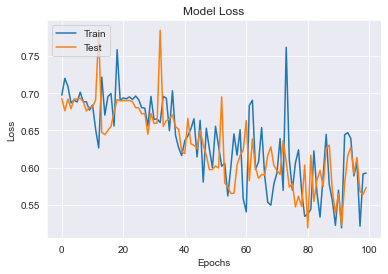

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')

## Model Performance

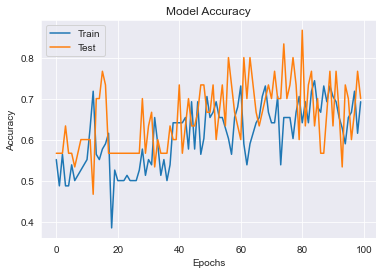

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')

## Saving the Model

In [86]:
model.save('C:/Users/HP/Desktop/ML Lab/food.h5')